In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from time import time
from keras.datasets import fashion_mnist
import numpy as np
from keras import regularizers

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [4]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [5]:
hidden_1 = Dense(32, activation='relu')(encoded)

In [6]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)

In [7]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [10]:
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [11]:
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [13]:
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.5389 - accuracy: 0.4386 - val_loss: 0.4559 - val_accuracy: 0.4831
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.4129 - accuracy: 0.4892 - val_loss: 0.3920 - val_accuracy: 0.4892
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3801 - accuracy: 0.4923 - val_loss: 0.3719 - val_accuracy: 0.4918
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3617 - accuracy: 0.4959 - val_loss: 0.3552 - val_accuracy: 0.4958
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3466 - accuracy: 0.4996 - val_loss: 0.3413 - val_accuracy: 0.4992


In [14]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [15]:
prediction = autoencoder.predict(x_test[1].reshape(1,784))

In [16]:
history = autoencoder.fit(x_train, x_train, batch_size=256, epochs=10, verbose=1, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3364 - accuracy: 0.5015 - val_loss: 0.3376 - val_accuracy: 0.4970
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3304 - accuracy: 0.5021 - val_loss: 0.3309 - val_accuracy: 0.5021
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3266 - accuracy: 0.5026 - val_loss: 0.3264 - val_accuracy: 0.4994
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3240 - accuracy: 0.5028 - val_loss: 0.3241 - val_accuracy: 0.5022
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3218 - accuracy: 0.5031 - val_loss: 0.3209 - val_accuracy: 0.5007
Epoch 6/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3199 - accuracy: 0.5033 - val_loss: 0.3208 - val_accuracy: 0.5027
Epoch 7/10
60000/60000 [==============================] - 3s 47us/st

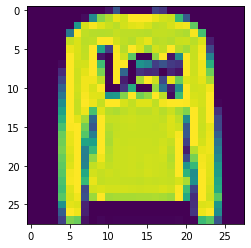

In [17]:
plt.imshow(x_test[1].reshape(28,28))
plt.show()

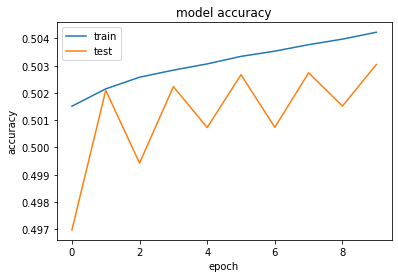

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

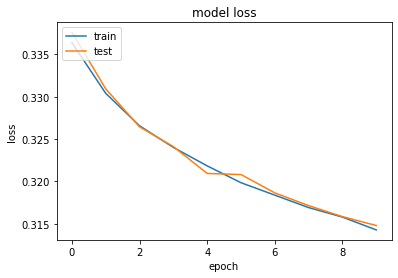

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Bonus Question

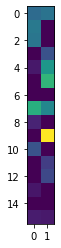

In [20]:
plt.imshow(encoded_imgs[1].reshape(16,2))
plt.show()

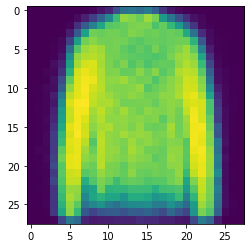

In [21]:
plt.imshow(prediction.reshape(28,28))
plt.show()